In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

Load dataset

In [29]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
y_train.shape

(50000, 1)

Data visualization

In [32]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [33]:
def plot_sample(X, y, index):
  plt.figure(figsize = (12,2))
  plt.xlabel(classes[y[index]])
  plt.imshow(X_train[index])

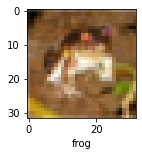

In [34]:
plot_sample(X_train, y_train, 0)

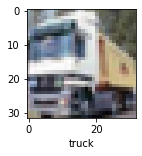

In [35]:
plot_sample(X_train, y_train, 1)

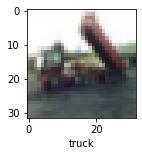

In [36]:
plot_sample(X_train, y_train, 2)

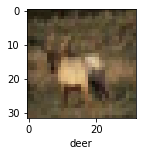

In [37]:
plot_sample(X_train, y_train, 3)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255


Normalizing the training data

In [38]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Model Building and Training

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model.compile(
    optimizer='SGD',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8107 - accuracy: 0.3577
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6245 - accuracy: 0.4254
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5413 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4809 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4330 - accuracy: 0.4944


lets make some predictions

In [40]:
yp = model.predict(X_test)
y_pred = [np.argmax(element) for element in yp]

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.65      0.50      1000
           1       0.62      0.59      0.61      1000
           2       0.57      0.13      0.21      1000
           3       0.35      0.11      0.16      1000
           4       0.51      0.23      0.31      1000
           5       0.25      0.64      0.36      1000
           6       0.64      0.28      0.39      1000
           7       0.47      0.58      0.52      1000
           8       0.50      0.71      0.58      1000
           9       0.59      0.51      0.54      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.42     10000
weighted avg       0.49      0.44      0.42     10000



Now lets build a CNN

In [51]:
cnn = keras.Sequential([
  #CNN 
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
  keras.layers.MaxPool2D((3,3)),

  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPool2D((2,2)),
  #Dense
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation = 'relu'),
  keras.layers.Dense(32, activation = 'relu'),
  keras.layers.Dense(10, activation = 'softmax')
])
cnn.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5668 - accuracy: 0.4195
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2201 - accuracy: 0.5630
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0738 - accuracy: 0.6229
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9736 - accuracy: 0.6601
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9131 - accuracy: 0.6830
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8652 - accuracy: 0.6975
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8200 - accuracy: 0.7136
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7830 - accuracy: 0.7294
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7491 - accuracy: 0.7389
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.718

In [52]:
cnn.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8598 - accuracy: 0.7049


[0.8597532510757446, 0.7049000263214111]

In [56]:
yp = cnn.predict(X_test)

y_pred = [np.argmax(element) for element in yp]
y_pred[:15]

[5, 1, 9, 0, 8, 9, 3, 6, 0, 1, 0, 9, 5, 7, 9]

In [57]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

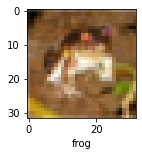

In [60]:
plot_sample(X_train, y_train, 0)